In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)

In [21]:
#converting year to datetime

df['year']=pd.to_datetime(df['year'], format='%Y')

In [165]:
# see my list of countries

df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [31]:
# A function to select and loc the data from a country.

def data_country(country):
    i=df.loc[df['country']==country]
    return i

In [158]:
data_country('Germany')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
546,1990-01-01,Germany,female,4390,38943900,0.801,1764967948917,23546,6.1190,4.965477,11.272625
547,1990-01-01,Germany,male,9534,36014900,0.801,1764967948917,23546,4.0393,2.841100,26.472377
674,1991-01-01,Germany,female,4354,39141800,NaN,1861873895109,24662,6.5251,4.955636,11.123658
675,1991-01-01,Germany,male,9656,36354100,NaN,1861873895109,24662,4.4244,2.838838,26.560966
804,1992-01-01,Germany,female,4132,39361600,NaN,2123130870382,27888,8.2263,4.944267,10.497541
...,...,...,...,...,...,...,...,...,...,...,...
4227,2013-01-01,Germany,male,7456,37737465,0.915,3752513503278,48563,5.5028,2.890736,19.757554
4382,2014-01-01,Germany,female,2588,39615918,0.916,3890606893347,50167,4.6308,4.935901,6.532728
4383,2014-01-01,Germany,male,7629,37936451,0.916,3890606893347,50167,5.2835,2.888164,20.109946
4524,2015-01-01,Germany,female,2685,39783984,NaN,3375611100742,43201,4.2209,4.953054,6.748947


In [307]:
# function to plot the suicide numbers per country 

def plot_suicide_rating(country):
    fig, ax = plt.subplots(figsize=(15,10))

    ax = sns.scatterplot(x=data_country(country)['year'],
                         y=data_country(country)['suicides_no'],
                         hue=data_country(country)['sex'], data=data_country(country), style='sex')
    
    ax1 = ax.twinx() 
    
    ax1 = sns.lineplot(x=data_country(country)['year'],
                       y=data_country(country)['suicides_per_100K'],
                       hue=data_country(country)['sex'], data=data_country(country),dashes=True)
    
    ax.set_xlabel("Year")
    ax.set_ylabel("suicides numbers")
    ax1.set_ylabel("suicides rate (per-100k)")
    
    
    
    #store the image
    plt.savefig(f'../ploting/suicide_R_{country}.png')



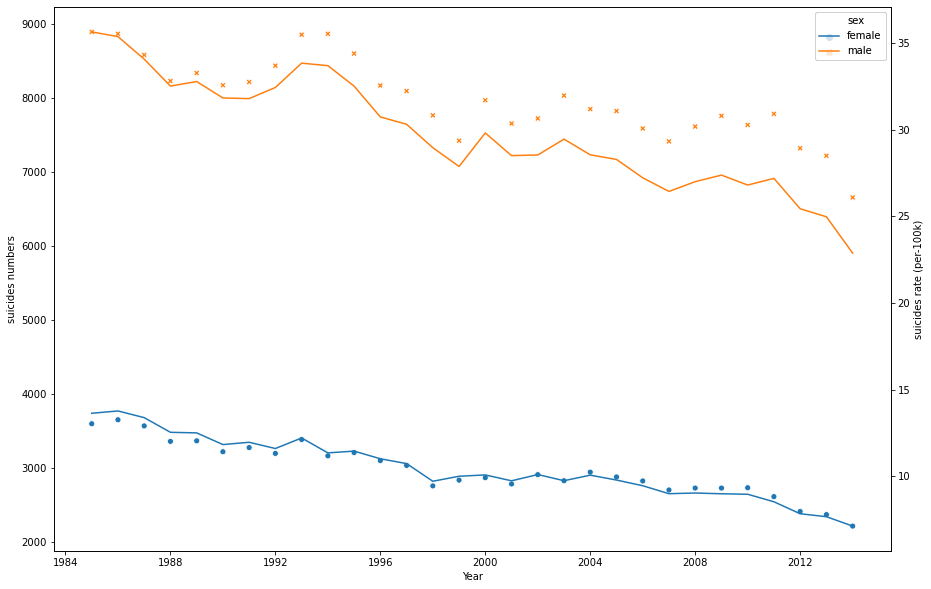

In [309]:
plot_suicide_rating('France')

In [281]:
def plot_suicide_variables(country,sex):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=data_country(country).loc[data_country(country)['sex']==sex]
    
    ax1.plot(df['year'], df['suicides_per_100K'], 'r-',label="suicides rate (per-100k)",linewidth=4)

    #(% of female labor force)    
    ax2.plot(df['year'], df['unemployment'], 'g-', label="Unemployment rate",linestyle='--') 
    
    ax3.plot(df['year'], df['depression_rate'],color='m',label="Depression rate",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("suicides rate (per-100k)")
    ax2.set_ylabel("Unemployment rate")
    ax3.set_ylabel("Depression rate")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('green')
    ax3.yaxis.label.set_color('m')


    

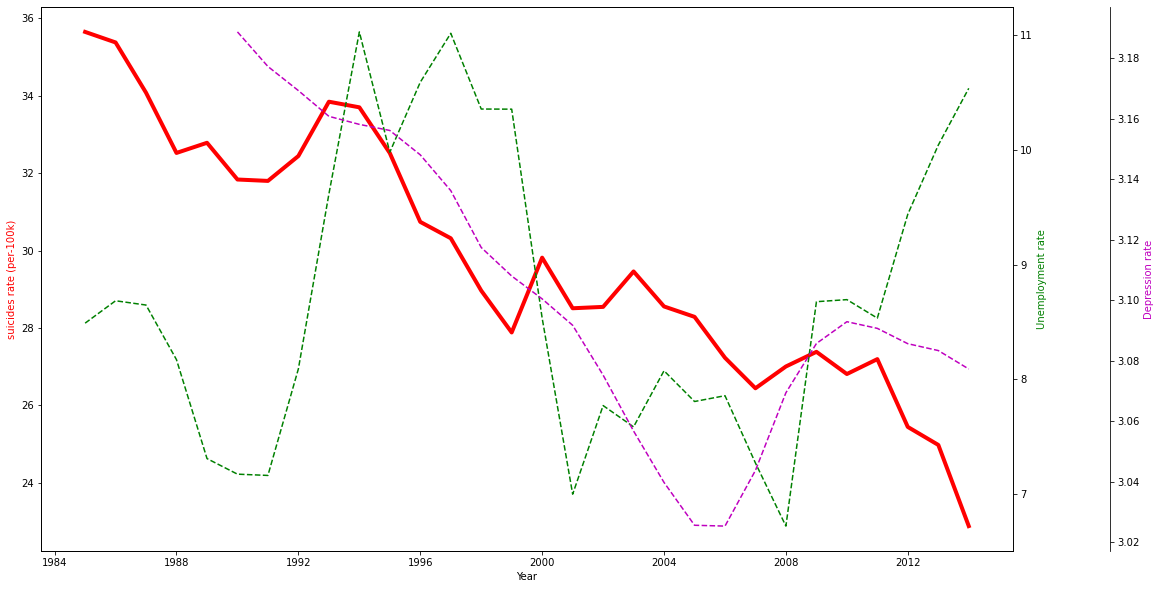

In [310]:
plot_suicide_variables('France', 'male')

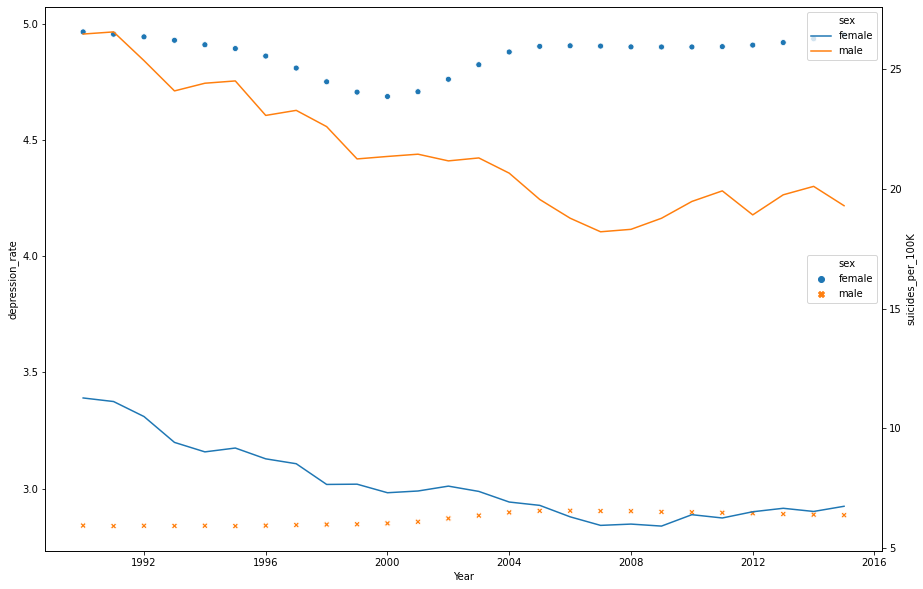

In [315]:

def plot_depressive_rating(country):
    fig, ax = plt.subplots(figsize=(15,10))

    ax = sns.scatterplot(x=data_country(country)['year'],
                         y=data_country(country)['depression_rate'],
                         hue=data_country(country)['sex'], data=data_country(country), style='sex')
    
    ax1 = ax.twinx() 
    
    ax1 = sns.lineplot(x=data_country(country)['year'],
                       y=data_country(country)['suicides_per_100K'],
                       hue=data_country(country)['sex'], data=data_country(country),dashes=True)
    
    ax.set_xlabel("Year")
    ax.set_ylabel("depression_rate")
    ax1.set_ylabel("suicides_per_100K")
    

plot_depressive_rating('Germany')    

In [313]:
#building the model and see the coeficients

# if negative coeficcient one must ask why!

def model_country(country,sex):
    df=data_country(country).loc[data_country(country)['sex']==sex]
    df = sm.add_constant(df)
    y = df['suicides_per_100K']
    X = df[[ 'const','unemployment','depression_rate']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [303]:
model_country('Germany','male')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides_per_100K   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     49.73
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           4.44e-09
Time:                        17:12:30   Log-Likelihood:                -38.768
No. Observations:                  26   AIC:                             83.54
Df Residuals:                      23   BIC:                             87.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             255.2215     25.040     10.193      0.000     203.423     307.020
unemployment       -0.1281      0.115     -1.109      0.279      -0.367       0.111
depression_rate   -81.0745      8.801     -9.212      0.000     -99.280     -62.869
==============================================================================
Omnibus:                        0.486   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.549
Skew:                           0.280   Prob(JB):                        0.760
Kurtosis:                       2.560   Cond. No.                         987.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.assing(rate_diff=)